#Recognizing Hand written digits

###Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

###Loading dataset

In [2]:
mnist=tf.keras.datasets.mnist

###Getting train and test split

In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.title(y_train[i])
  plt.show()

###Normalize data

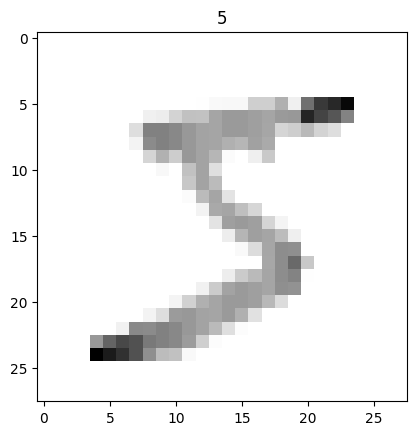

In [6]:
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(X_test, axis=1)
plot_input_img(0)

This is other method method of preprocessing

In [7]:
# #preprocessing the image

# #Normalizing the image to [0,1] range
# X_train = X_train.astype(np.float32)/255
# X_test = X_test.astype(np.float32)/255

# #reshape / expand the dimentions of images to (28,28,1)
# X_train = np.expand_dims(X_train,-1)
# X_test = np.expand_dims(X_test,-1)

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

###Resizing image to make it suitable for Convolution operation

In [9]:
IMG_SIZE=28
X_trainr=np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension for kernel/filter operation
X_testr=np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increasing one dimension for kernel/filter operation
(X_trainr.shape,X_testr.shape)

((60000, 28, 28, 1), (10000, 28, 28, 1))

###Creating deep learning network

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [11]:
#creating a nural network
model=Sequential()

#first convolution layer (60000,28,28,1)
model.add(Conv2D(64,(3,3),input_shape=X_trainr.shape[1:])) #only for first convolution layer to mention input size
model.add(Activation("relu")) #activation function
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling single maximum value of 2x2

#second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer 1
model.add(Flatten()) # before using fully connected layer, need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation('relu'))

#fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

#last fully connected layer, output must be equal to number of classes 10 (0-9)
model.add(Dense(10)) #last dense layer must be equal to 10
model.add(Activation('softmax')) #activation function is changed to softmax (class probabilities)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

Using Adams optimizer which optimized and faster gradient descend

In [13]:
 model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

###Training model with 30% split for test set

In [14]:
#train model
model.fit(X_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 69s 52ms/step - loss: 0.3340 - accuracy: 0.8957 - val_loss: 0.1667 - val_accuracy: 0.9479
Epoch 2/5
1313/1313 [==============================] - 69s 52ms/step - loss: 0.1111 - accuracy: 0.9667 - val_loss: 0.1022 - val_accuracy: 0.9682
Epoch 3/5
1313/1313 [==============================] - 66s 51ms/step - loss: 0.0831 - accuracy: 0.9750 - val_loss: 0.0856 - val_accuracy: 0.9743
Epoch 4/5
1313/1313 [==============================] - 65s 49ms/step - loss: 0.0627 - accuracy: 0.9801 - val_loss: 0.0712 - val_accuracy: 0.9789
Epoch 5/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0520 - accuracy: 0.9827 - val_loss: 0.0797 - val_accuracy: 0.9774


In [15]:
#Evaluating on testing dataset
test_loss, test_acc = model.evaluate(X_testr,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0678 - accuracy: 0.9789


###Taking test set predections

In [16]:
predictions = model.predict([X_testr])

313/313 [==============================] - 4s 12ms/step


In [17]:
print(predictions) #actually these predictions are based on one hot encoding so these are only arrays, containing softmax probilities

[[5.18356273e-07 7.48032180e-05 6.40375220e-05 ... 9.99844313e-01
  1.96247186e-07 1.25958186e-05]
 [1.36712315e-05 1.64803241e-05 9.99895513e-01 ... 5.11913458e-06
  1.11549416e-05 7.55527537e-07]
 [2.06972504e-06 9.99986470e-01 1.78811092e-07 ... 1.44964190e-06
  5.31995568e-07 2.34930803e-06]
 ...
 [3.24825877e-09 7.35641663e-08 1.33944184e-07 ... 2.16373465e-07
  8.35842059e-07 3.75861455e-05]
 [9.83785412e-06 3.23195408e-08 1.34923068e-08 ... 2.48276932e-09
  7.44043427e-06 3.92064467e-05]
 [2.22647441e-06 2.85361121e-08 5.19705111e-07 ... 9.13183834e-11
  6.26267638e-06 2.21820969e-07]]


In [18]:
for i in range(len(predictions)):
  print(np.argmax(predictions[i]),y_test[i])

Streaming output truncated to the last 5000 lines.
3 3
9 9
9 9
8 8
4 4
1 1
0 0
6 6
0 0
9 9
6 6
8 8
6 6
1 1
1 1
9 9
8 8
9 9
2 2
3 3
5 5
5 5
9 9
4 4
2 2
1 1
9 9
4 4
3 3
9 9
6 6
0 0
4 4
0 0
6 6
0 0
1 1
2 2
3 3
4 4
7 7
8 8
9 9
0 0
1 1
2 2
3 3
4 4
7 7
8 8
9 9
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
8 8
3 3
4 4
7 7
8 8
6 6
3 3
4 4
0 0
9 9
7 7
1 1
9 9
3 3
8 8
4 4
7 7
3 3
0 0
9 9
1 1
4 4
5 5
4 4
6 6
4 2
0 0
6 6
2 2
1 1
1 1
1 1
1 1
7 7
2 2
4 4
7 7
5 5
2 2
9 9
4 4
5 5
8 8
4 4
2 2
9 9
7 7
0 0
0 0
7 7
5 5
1 1
1 1
7 7
6 6
6 6
6 6
8 8
2 2
2 2
7 7
7 7
4 4
0 0
2 2
4 4
2 2
1 1
8 8
9 9
6 6
1 1
0 0
5 5
9 9
6 6
9 9
8 8
0 0
3 3
0 0
8 8
3 3
9 9
6 6
3 3
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
6 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
5 5
4 4
4 8
7 7
4 4
7 7
7 7
3 3
9 9
8 8
8 8
3 3
1 1
5 5
8 8
2 2
7 7
4 4
2 2
1 1
5 5
4 4
5 5
5 5
8 8
4 6
4 4
4 4
4 4
1 1
8 8
7 7
5 5
5 5
1 1
8 8
9 9
1 1
3 3
6 6
3 3
3 3
2 2
2 2
6 6
9 9
9 9
4 6
5 5
5 5
3 3
3 3
8 8
1 1
6 6
5 5
6 6
8 8
1 1
9 9
7 7
6 6
8 8
3

#Predecting digit handwritten in image format

In [19]:
#upload a handwritten digit file name as filename in png format (change file name and format as desired)
img=cv2.imread('filename.png')

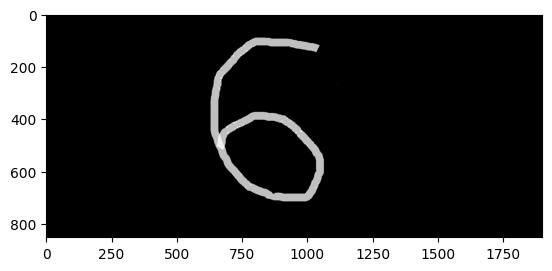

In [20]:
plt.imshow(img)

In [21]:
img.shape

(852, 1899, 3)

In [22]:
grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [23]:
resized=cv2.resize(grey,(28,28),interpolation=cv2.INTER_AREA)

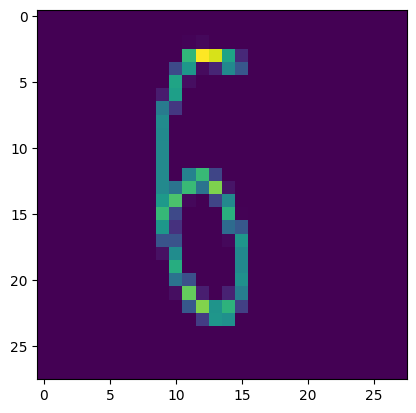

In [24]:
plt.imshow(resized)

In [25]:
#normalize 0 to 1 scaling
newimg=tf.keras.utils.normalize(resized, axis=1)

In [26]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #kernel operation of convolution layer

In [27]:
newimg.shape

(1, 28, 28, 1)

In [28]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 94ms/step


In [29]:
print(predictions)

[[1.1249751e-05 9.5048991e-09 3.7636960e-07 2.5600756e-11 1.2116678e-05
  4.1320372e-06 9.9997127e-01 4.3613247e-12 4.3591280e-07 3.5113001e-07]]


As output layer as softmax function we get output as probabilities, so output is that digit which as highest probability

In [30]:
print(np.argmax(predictions))

6
